In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import datetime




In [2]:
# Load datasets
gold = pd.read_csv('Google_Stock_Price_Train.csv', parse_dates=['Date'])
news = pd.read_csv('gold-dataset-sinha-khandait.csv', parse_dates=['Dates'])
gold_history = pd.read_csv('Gold HistoricalData_1628818323325.csv', parse_dates=['Date'])

# Preview
print(gold.head())
print(news.head())
print(gold_history.head())

        Date    Open    High     Low   Close      Volume
0 2012-01-03  325.25  332.83  324.97  663.59   7,380,500
1 2012-01-04  331.27  333.87  329.08  666.45   5,749,400
2 2012-01-05  329.83  330.75  326.89  657.21   6,590,300
3 2012-01-06  328.34  328.77  323.68  648.24   5,405,900
4 2012-01-09  322.04  322.29  309.46  620.76  11,688,800
        Dates                                                URL  \
0  28-01-2016  http://www.marketwatch.com/story/april-gold-do...   
1  13-09-2017  http://www.marketwatch.com/story/gold-prices-s...   
2  26-07-2016  http://www.marketwatch.com/story/gold-futures-...   
3  28-02-2018  https://www.metalsdaily.com/link/277199/dent-r...   
4    6/9/2017  http://www.marketwatch.com/story/gold-steadies...   

                                                News  
0  april gold down 20 cents to settle at $1,116.1...  
1          gold suffers third straight daily decline  
2     Gold futures edge up after two-session decline  
3  dent research : is gold's 

/var/folders/wr/t_bxfzcj2833m59mtbb50m_w0000gn/T/ipykernel_88168/2869182932.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  news = pd.read_csv('gold-dataset-sinha-khandait.csv', parse_dates=['Dates'])


In [3]:
# Sort & set index
gold.sort_values('Date', inplace=True)
news.sort_values('Dates', inplace=True)
gold_history.sort_values('Date', inplace=True)

# Remove duplicates/nulls
news.drop_duplicates(subset='News', inplace=True)
news.dropna(subset=['News'], inplace=True)

news = news.rename(columns={
    'Dates': 'Date'
})



In [4]:
print(news[news['Date'] == "0200-03-10"])
print(news[news['Date'] == "0200-03-11"])

news = news[news['Date'] != "0200-03-10"]

news = news[news['Date'] != "0200-09-11"]

bad_dates = news[news['Date'].str.startswith('02')]
print(bad_dates.count())

# To get just these dates
print(bad_dates['Date'].unique())




            Date                                                URL  \
9253  0200-03-10  http://www.marketwatch.com/story/gold-falls-be...   

                                            News  
9253  gold falls below $900 as u.s. stocks rally  
            Date                                                URL  \
9750  0200-03-11  http://www.marketwatch.com/story/gold-futures-...   

                         News  
9750  gold futures under $400  
Date    163
URL     163
News    163
dtype: int64
['0200-03-11' '0200-03-12' '0200-03-13' '0200-03-14' '0200-03-15'
 '0200-03-17' '0200-03-19' '0200-03-22' '0200-03-23' '0200-03-26'
 '0200-03-30' '0200-04-11' '0200-04-12' '0200-04-13' '0200-04-14'
 '0200-04-16' '0200-04-19' '0200-04-21' '0200-04-22' '0200-04-23'
 '0200-04-25' '0200-04-26' '0200-04-27' '0200-04-28' '0200-04-29'
 '0200-04-30' '0200-09-10' '0200-09-12' '0200-09-13' '0200-09-14'
 '0200-09-15' '0200-09-16' '0200-09-17' '0200-09-18' '0200-09-19'
 '0200-09-20' '0200-09-21' '0200-09-2

In [5]:
# Method 1: Check if any dates start with '02'
bad_dates = news[news['Date'].str.startswith('02')]
print("Number of rows with dates starting with '02':", len(bad_dates))

# Method 2: Show the actual dates if any exist
if len(bad_dates) > 0:
    print("\nDates that still remain:")
    print(bad_dates['Date'].unique())
else:
    print("\nAll dates starting with '02' have been successfully removed!")

# Method 3: Show the value counts of the first two digits of all dates
print("\nFirst two digits distribution in dates:")
print(news['Date'].str[:2].value_counts())


Number of rows with dates starting with '02': 163

Dates that still remain:
['0200-03-11' '0200-03-12' '0200-03-13' '0200-03-14' '0200-03-15'
 '0200-03-17' '0200-03-19' '0200-03-22' '0200-03-23' '0200-03-26'
 '0200-03-30' '0200-04-11' '0200-04-12' '0200-04-13' '0200-04-14'
 '0200-04-16' '0200-04-19' '0200-04-21' '0200-04-22' '0200-04-23'
 '0200-04-25' '0200-04-26' '0200-04-27' '0200-04-28' '0200-04-29'
 '0200-04-30' '0200-09-10' '0200-09-12' '0200-09-13' '0200-09-14'
 '0200-09-15' '0200-09-16' '0200-09-17' '0200-09-18' '0200-09-19'
 '0200-09-20' '0200-09-21' '0200-09-22' '0200-09-23' '0200-09-25'
 '0200-09-26' '0200-09-29' '0200-09-30' '0201-03-10' '0201-03-13'
 '0201-03-15' '0201-03-16' '0201-03-17' '0201-03-18' '0201-03-19'
 '0201-03-20' '0201-03-21' '0201-03-22' '0201-03-23' '0201-03-26'
 '0201-03-27' '0201-03-29' '0201-04-10' '0201-04-11' '0201-04-12'
 '0201-04-14' '0201-04-15' '0201-04-17' '0201-04-18' '0201-04-19'
 '0201-04-20' '0201-04-21' '0201-04-23' '0201-04-24' '0201-04-25'


In [6]:
# Remove all dates that start with '02'
news = news[~news['Date'].astype(str).str.startswith('02')]

# Verify the removal
bad_dates = news[news['Date'].astype(str).str.startswith('02')]
print("Number of remaining bad dates:", len(bad_dates))

# Optional: Show the distribution of first two digits of dates after removal
print("\nFirst two digits distribution in dates after removal:")
print(news['Date'].astype(str).str[:2].value_counts())

Number of remaining bad dates: 0

First two digits distribution in dates after removal:
Date
12    373
17    371
21    367
5/    364
28    360
27    358
1/    354
7/    353
10    351
3/    348
13    347
20    347
8/    346
6/    345
18    345
9/    344
2/    344
19    340
14    339
15    336
30    335
23    335
22    333
24    325
26    319
16    318
25    310
11    308
4/    300
29    284
31    206
Name: count, dtype: int64


In [7]:
# First convert the news DataFrame dates with mixed formats
news['Date'] = pd.to_datetime(news['Date'], format='mixed', dayfirst=True)

# Convert gold DataFrame dates (these appear to be in a consistent format)
gold['Date'] = pd.to_datetime(gold['Date'])

# Convert gold_history DataFrame dates
gold_history['Date'] = pd.to_datetime(gold_history['Date'])

# Verify the conversions worked
print("News dates dtype:", news['Date'].dtype)
print("Gold dates dtype:", gold['Date'].dtype)
print("Gold history dates dtype:", gold_history['Date'].dtype)

# Optional: Display a few rows from each to verify the conversion
print("\nNews dates sample:")
print(news['Date'].head())
print("\nGold dates sample:")
print(gold['Date'].head())
print("\nGold history dates sample:")
print(gold_history['Date'].head())

News dates dtype: datetime64[ns]
Gold dates dtype: datetime64[ns]
Gold history dates dtype: datetime64[ns]

News dates sample:
1564   2007-01-01
3627   2009-01-01
7655   2015-01-01
2674   2016-01-01
9675   2018-01-01
Name: Date, dtype: datetime64[ns]

Gold dates sample:
0   2012-01-03
1   2012-01-04
2   2012-01-05
3   2012-01-06
4   2012-01-09
Name: Date, dtype: datetime64[ns]

Gold history dates sample:
2558   2011-08-12
2557   2011-08-15
2556   2011-08-16
2555   2011-08-17
2554   2011-08-18
Name: Date, dtype: datetime64[ns]


In [8]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

news[['polarity', 'subjectivity']] = news['News'].apply(lambda x: pd.Series(get_sentiment(x)))

# Flag if headline is about future movement
future_keywords = ['will', 'expected', 'projected', 'forecast', 'anticipate']
news['is_future'] = news['News'].str.lower().apply(lambda x: int(any(word in x for word in future_keywords)))


In [9]:
news.head()

,Date,URL,News,polarity,subjectivity,is_future
1564,2007-01-01,https://economictimes.indiatimes.com/markets/c...,ncdex to launch 10 gm gold contract,0.000000,0.000000,0
3627,2009-01-01,https://economictimes.indiatimes.com/articlesh...,gold sparkles despite its year-end blip,0.000000,0.000000,0
7655,2015-01-01,https://www.thehindubusinessline.com/opinion/c...,China's large imports lend solid support to go...,0.107143,0.264286,0
2674,2016-01-01,https://economictimes.indiatimes.com/markets/c...,gold begins 2016 with a glitter on jewellers b...,0.000000,0.000000,0
9675,2018-01-01,https://www.metalsdaily.com/link/275274/golds-...,gold's 2018 high price forecast: conservativel...,0.160000,0.540000,1


In [10]:
# Daily sentiment mean
daily_sentiment = news.groupby('Date').agg({
    'polarity': 'mean',
    'subjectivity': 'mean',
    'is_future': 'mean',  # % of future-focused headlines
    'News': 'count'
}).rename(columns={'News': 'news_volume'}).reset_index()

# Merge with gold data
data = pd.merge(gold, daily_sentiment, on='Date', how='left')


In [11]:
data.head()

,Date,Open,High,Low,Close,Volume,polarity,subjectivity,is_future,news_volume
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500",0.083333,0.166667,0.000000,3.0
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400",0.107143,0.542857,0.000000,7.0
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300",-0.466667,0.666667,0.333333,3.0
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900",-0.037500,0.087500,0.000000,2.0
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800",NaN,NaN,NaN,NaN


In [12]:
# 1. Price-based features
# Convert price columns to numeric (they appear to be already numeric, but just to be safe)
numeric_cols = ['Open', 'High', 'Low', 'Close']
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Basic price features
data['price_range'] = data['High'] - data['Low']  # Daily price range
data['price_range_pct'] = data['price_range'] / data['Open']  # Normalized price range
data['returns'] = data['Close'].pct_change()  # Daily returns
data['gap'] = (data['Open'] - data['Close'].shift(1)) / data['Close'].shift(1)  # Overnight gap

# Technical indicators
data['sma_5'] = data['Close'].rolling(window=5).mean()  # 5-day moving average
data['sma_20'] = data['Close'].rolling(window=20).mean()  # 20-day moving average
data['volatility_5'] = data['returns'].rolling(window=5).std()  # 5-day volatility
data['rsi'] = (
    data['returns']
    .apply(lambda x: 100 - (100 / (1 + (x if x > 0 else 0) / (-x if x < 0 else 1e-9))))
    .rolling(window=14)
    .mean()
)

# 2. Volume-based features
# Convert Volume to numeric, removing commas
data['Volume'] = pd.to_numeric(data['Volume'].str.replace(',', ''), errors='coerce')

# Volume features
data['volume_ma5'] = data['Volume'].rolling(window=5).mean()
data['relative_volume'] = data['Volume'] / data['volume_ma5']
data['volume_trend'] = data['Volume'].pct_change()
data['price_volume_ratio'] = data['returns'].abs() / data['Volume']  # Price impact

# 3. Sentiment-based features
# Fill NaN values with 0 or forward fill for sentiment features
sentiment_cols = ['polarity', 'subjectivity', 'is_future', 'news_volume']
data[sentiment_cols] = data[sentiment_cols].fillna(method='ffill')

# Sentiment features
data['sentiment_ma3'] = data['polarity'].rolling(window=3).mean()
data['sentiment_ma7'] = data['polarity'].rolling(window=7).mean()
data['sentiment_trend'] = data['polarity'].diff()
data['sentiment_volatility'] = data['polarity'].rolling(window=5).std()
data['cumulative_sentiment'] = data['polarity'].expanding().mean()

# 4. Combined features
data['sent_vol_impact'] = data['polarity'] * data['relative_volume']
data['price_sent_agreement'] = (data['returns'] * data['polarity']).apply(lambda x: 1 if x > 0 else -1)

# 5. Target variables
data['next_day_return'] = data['returns'].shift(-1)
data['target_direction'] = (data['next_day_return'] > 0).astype(int)
data['target_significant'] = (data['next_day_return'].abs() > data['returns'].std()).astype(int)

# 6. Time-based features
data['day_of_week'] = data['Date'].dt.dayofweek
data['month'] = data['Date'].dt.month
data['quarter'] = data['Date'].dt.quarter

# Create dummy variables for day of week
dow_dummies = pd.get_dummies(data['day_of_week'], prefix='dow')
data = pd.concat([data, dow_dummies], axis=1)

# Print feature correlations with target
print("\nFeature Correlations with Next Day Return:")
correlations = data.corr()['next_day_return'].sort_values(ascending=False)
print(correlations.head(10))
print("\nFeature Correlations with Target Direction:")
correlations = data.corr()['target_direction'].sort_values(ascending=False)
print(correlations.head(10))

# Basic statistics of new features
print("\nNew Features Statistics:")
new_features = ['price_range_pct', 'volatility_5', 'relative_volume', 
                'sentiment_ma3', 'sent_vol_impact', 'price_sent_agreement']
print(data[new_features].describe())


Feature Correlations with Next Day Return:
next_day_return         1.000000
target_direction        0.543643
rsi                     0.050304
cumulative_sentiment    0.048051
dow_1                   0.042561
polarity                0.037268
sent_vol_impact         0.035433
returns                 0.031244
quarter                 0.030713
sentiment_trend         0.026211
Name: next_day_return, dtype: float64

Feature Correlations with Target Direction:
target_direction        1.000000
next_day_return         0.543643
rsi                     0.181797
cumulative_sentiment    0.064704
volatility_5            0.062026
price_sent_agreement    0.061258
polarity                0.060705
sent_vol_impact         0.058971
target_significant      0.058924
sentiment_ma3           0.036469
Name: target_direction, dtype: float64

New Features Statistics:
       price_range_pct  volatility_5  relative_volume  sentiment_ma3  \
count      1258.000000   1253.000000      1254.000000    1256.000000   
mean

/var/folders/wr/t_bxfzcj2833m59mtbb50m_w0000gn/T/ipykernel_88168/2024977829.py:9: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data['returns'] = data['Close'].pct_change()  # Daily returns
/var/folders/wr/t_bxfzcj2833m59mtbb50m_w0000gn/T/ipykernel_88168/2024977829.py:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[sentiment_cols] = data[sentiment_cols].fillna(method='ffill')


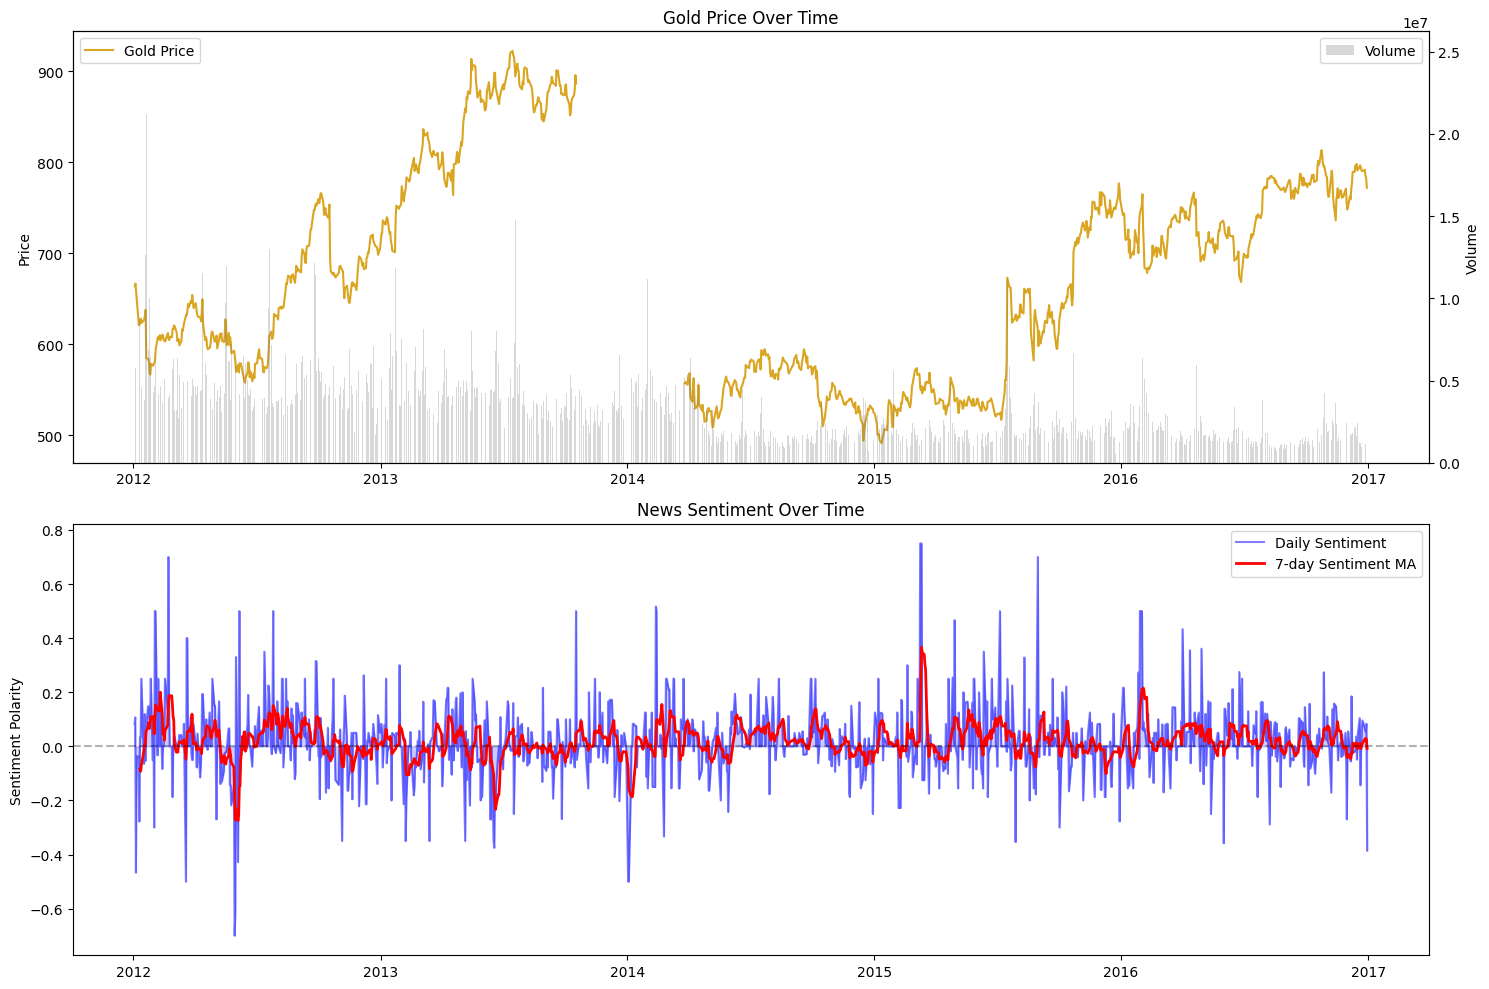

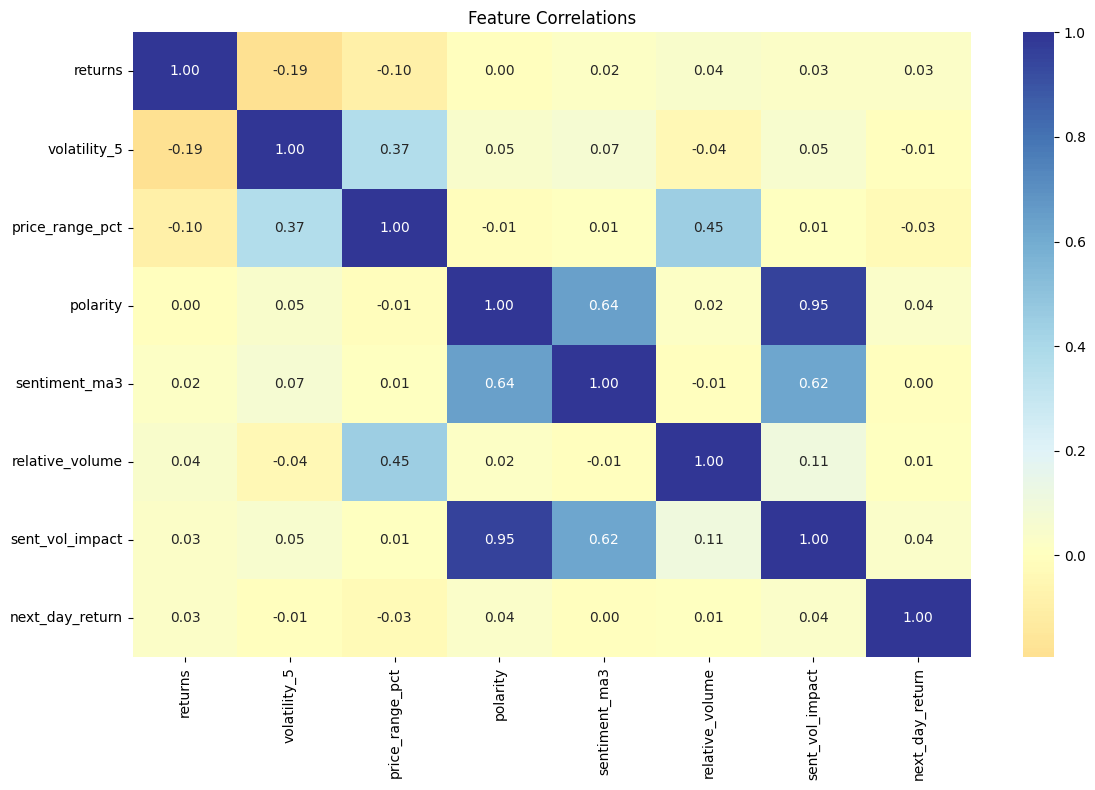

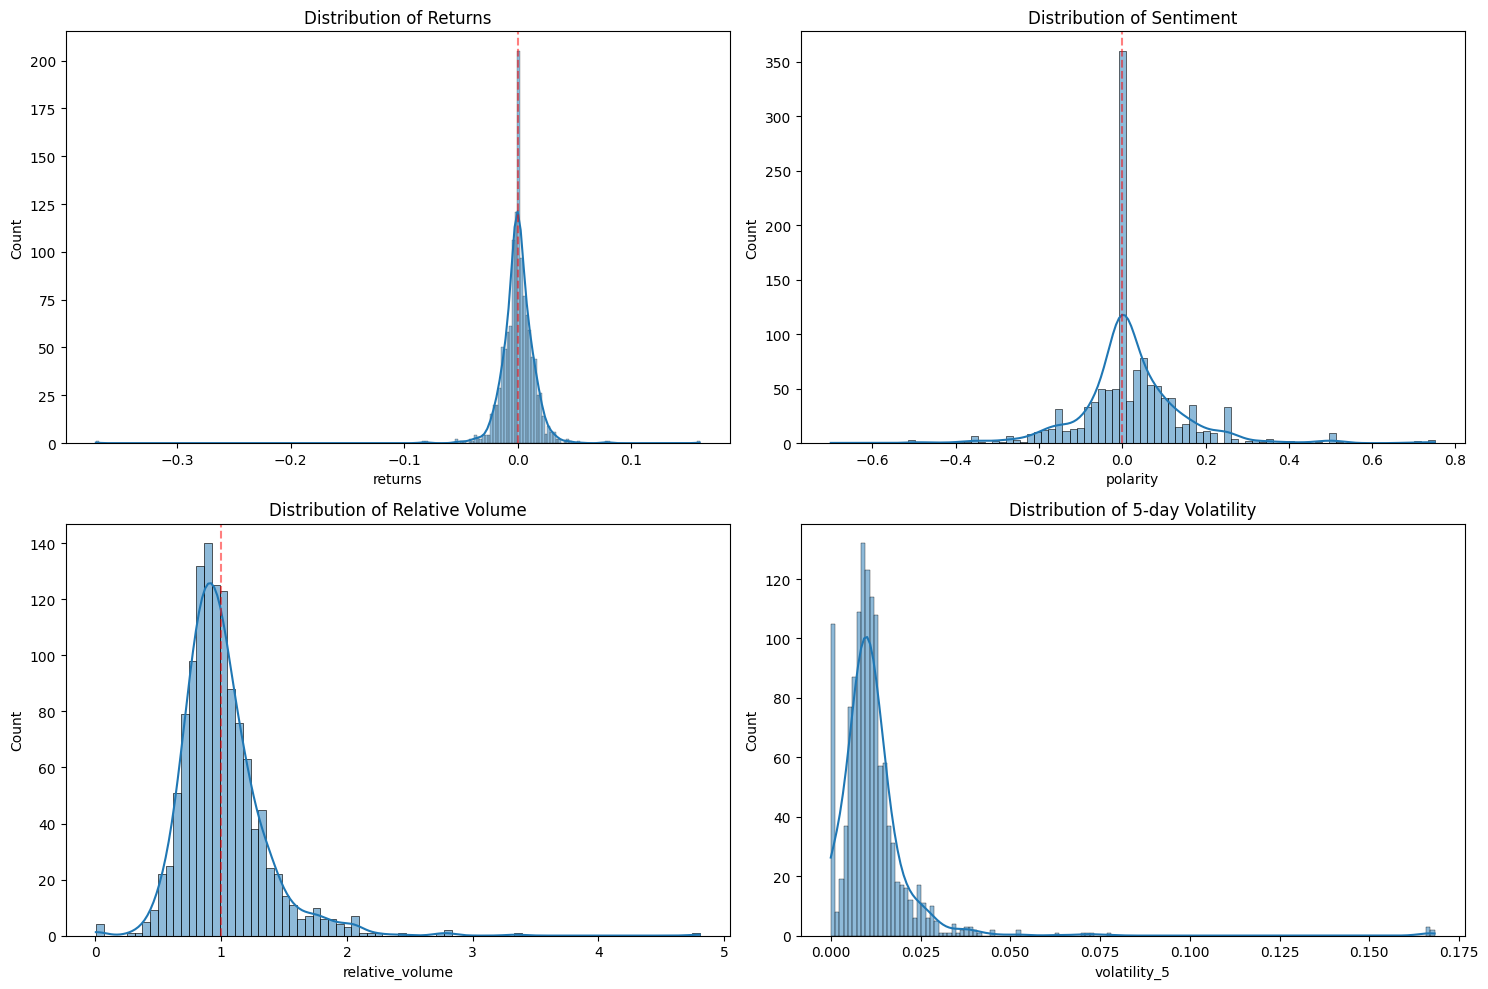

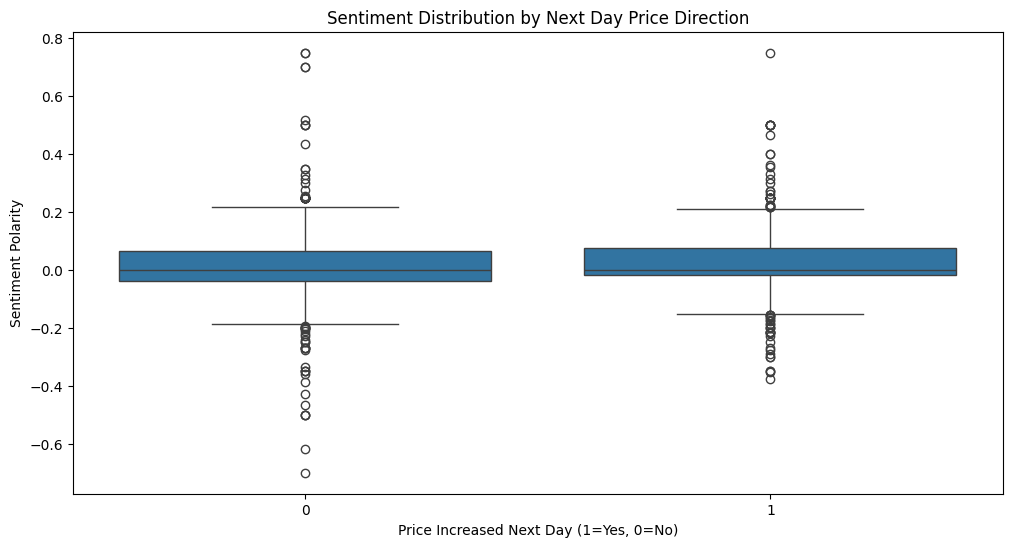

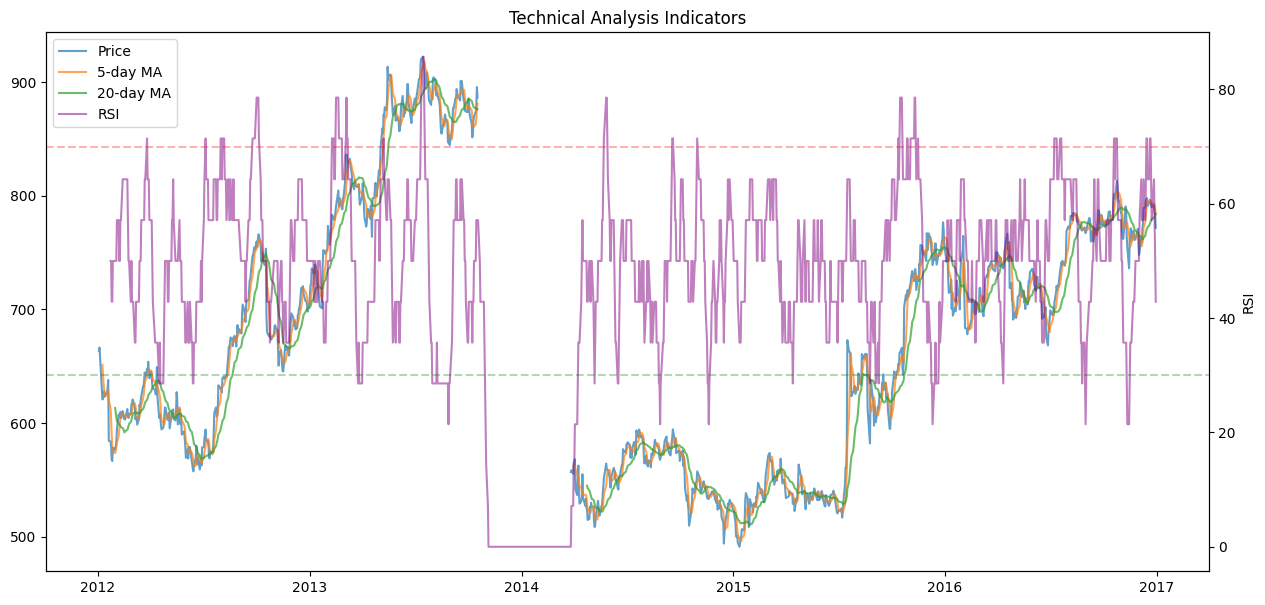

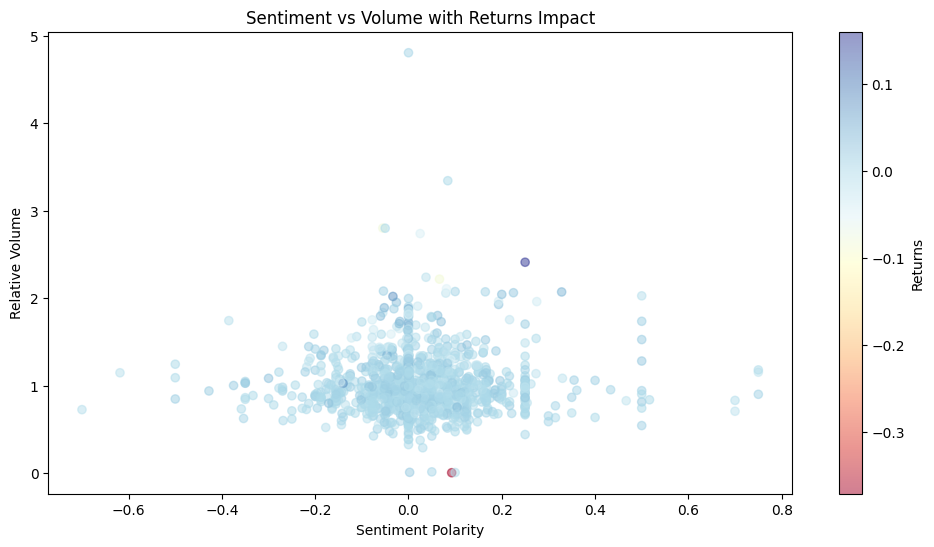

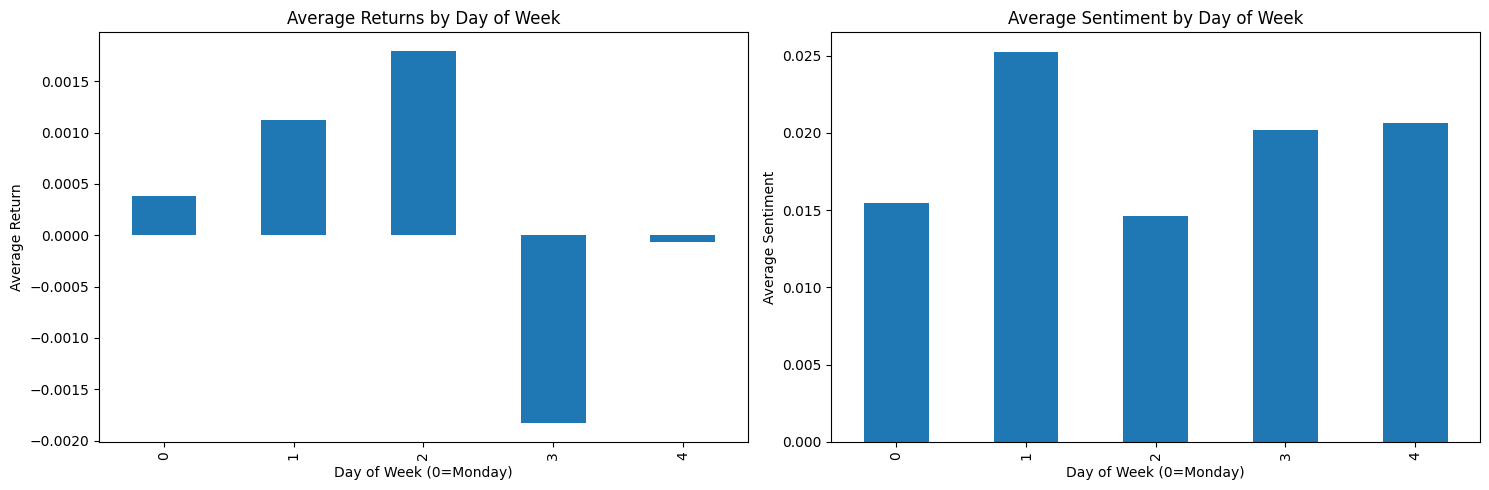


Summary Statistics:

Average Daily Return by Sentiment Direction:
polarity
False    0.000956
True    -0.000585
Name: returns, dtype: float64

Success Rate of Sentiment Signals:
Sentiment Direction Accuracy: 53.10%


In [13]:
# Set up the visualization style
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 6]

# 1. Price and Sentiment Over Time
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Price plot with volume
ax1.plot(data['Date'], data['Close'], label='Gold Price', color='goldenrod')
ax1.set_title('Gold Price Over Time')
ax1.set_ylabel('Price')
ax1.legend(loc='upper left')

# Add volume as bar chart on secondary axis
ax1_volume = ax1.twinx()
ax1_volume.bar(data['Date'], data['Volume'], alpha=0.3, color='gray', label='Volume')
ax1_volume.set_ylabel('Volume')
ax1_volume.legend(loc='upper right')

# Sentiment plot
ax2.plot(data['Date'], data['polarity'], label='Daily Sentiment', color='blue', alpha=0.5)
ax2.plot(data['Date'], data['sentiment_ma7'], label='7-day Sentiment MA', color='red', linewidth=2)
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.3)
ax2.fill_between(data['Date'], data['polarity'], 0, alpha=0.2, color='blue')
ax2.set_title('News Sentiment Over Time')
ax2.set_ylabel('Sentiment Polarity')
ax2.legend()

plt.tight_layout()
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(12, 8))
selected_features = [
    'returns', 'volatility_5', 'price_range_pct', 
    'polarity', 'sentiment_ma3', 'relative_volume',
    'sent_vol_impact', 'next_day_return'
]
sns.heatmap(data[selected_features].corr(), 
            annot=True, 
            cmap='RdYlBu', 
            center=0,
            fmt='.2f')
plt.title('Feature Correlations')
plt.tight_layout()
plt.show()

# 3. Distribution Plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Returns distribution
sns.histplot(data=data, x='returns', kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribution of Returns')
axes[0,0].axvline(x=0, color='red', linestyle='--', alpha=0.5)

# Sentiment distribution
sns.histplot(data=data, x='polarity', kde=True, ax=axes[0,1])
axes[0,1].set_title('Distribution of Sentiment')
axes[0,1].axvline(x=0, color='red', linestyle='--', alpha=0.5)

# Volume distribution
sns.histplot(data=data, x='relative_volume', kde=True, ax=axes[1,0])
axes[1,0].set_title('Distribution of Relative Volume')
axes[1,0].axvline(x=1, color='red', linestyle='--', alpha=0.5)

# Volatility distribution
sns.histplot(data=data, x='volatility_5', kde=True, ax=axes[1,1])
axes[1,1].set_title('Distribution of 5-day Volatility')

plt.tight_layout()
plt.show()

# 4. Sentiment Impact Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='target_direction', y='polarity')
plt.title('Sentiment Distribution by Next Day Price Direction')
plt.xlabel('Price Increased Next Day (1=Yes, 0=No)')
plt.ylabel('Sentiment Polarity')
plt.show()

# 5. Technical Analysis Plot
fig, ax = plt.subplots(figsize=(15, 7))

# Plot price and moving averages
ax.plot(data['Date'], data['Close'], label='Price', alpha=0.7)
ax.plot(data['Date'], data['sma_5'], label='5-day MA', alpha=0.7)
ax.plot(data['Date'], data['sma_20'], label='20-day MA', alpha=0.7)

# Add RSI on secondary axis
ax2 = ax.twinx()
ax2.plot(data['Date'], data['rsi'], label='RSI', color='purple', alpha=0.5)
ax2.axhline(y=70, color='red', linestyle='--', alpha=0.3)
ax2.axhline(y=30, color='green', linestyle='--', alpha=0.3)
ax2.set_ylabel('RSI')

# Combine legends
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Technical Analysis Indicators')
plt.show()

# 6. Sentiment vs Volume Impact
plt.figure(figsize=(12, 6))
plt.scatter(data['polarity'], data['relative_volume'], 
           alpha=0.5, c=data['returns'], cmap='RdYlBu')
plt.colorbar(label='Returns')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Relative Volume')
plt.title('Sentiment vs Volume with Returns Impact')
plt.show()

# 7. Time-based Analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Average returns by day of week
daily_returns = data.groupby('day_of_week')['returns'].mean()
daily_returns.plot(kind='bar', ax=ax1)
ax1.set_title('Average Returns by Day of Week')
ax1.set_xlabel('Day of Week (0=Monday)')
ax1.set_ylabel('Average Return')

# Average sentiment by day of week
daily_sentiment = data.groupby('day_of_week')['polarity'].mean()
daily_sentiment.plot(kind='bar', ax=ax2)
ax2.set_title('Average Sentiment by Day of Week')
ax2.set_xlabel('Day of Week (0=Monday)')
ax2.set_ylabel('Average Sentiment')

plt.tight_layout()
plt.show()

# Print some summary statistics
print("\nSummary Statistics:")
print("\nAverage Daily Return by Sentiment Direction:")
print(data.groupby(data['polarity'] > 0)['returns'].mean())

print("\nSuccess Rate of Sentiment Signals:")
success_rate = (
    (data['polarity'] > 0) == (data['next_day_return'] > 0)
).mean()
print(f"Sentiment Direction Accuracy: {success_rate:.2%}")

Data cleaned successfully


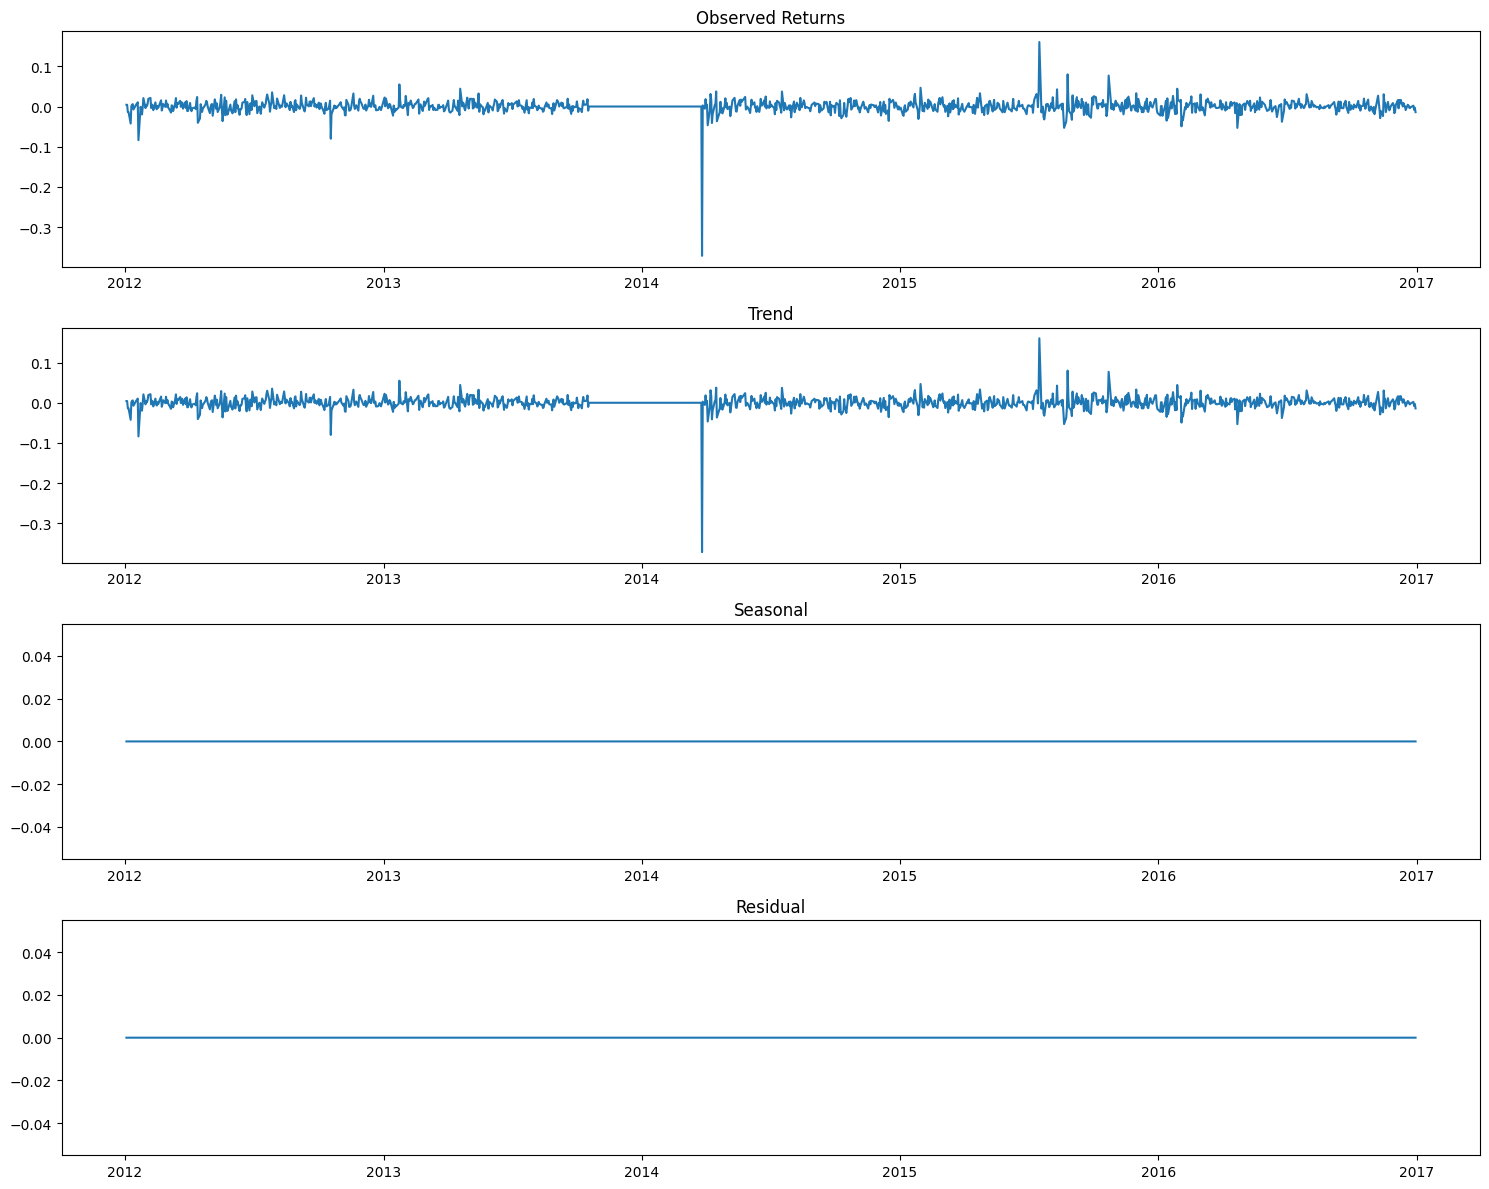

In [14]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# 1. Prepare the time series data
data.set_index('Date', inplace=True)
data.sort_index(inplace=True)

# Clean the returns data properly
returns_clean = data['returns'].copy()
# Forward fill, then backward fill to handle any remaining NaN values
returns_clean = returns_clean.ffill().bfill()

# Verify no missing values
if returns_clean.isna().any():
    print("Warning: Still have missing values after cleaning")
else:
    print("Data cleaned successfully")

# 2. Seasonal Decomposition of Returns
try:
    decomposition = seasonal_decompose(returns_clean, 
                                     period=1,  # 5 for weekly pattern
                                     model='additive')

    # Plot decomposition
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
    
    ax1.plot(decomposition.observed)
    ax1.set_title('Observed Returns')
    ax1.set_xlabel('')
    
    ax2.plot(decomposition.trend)
    ax2.set_title('Trend')
    ax2.set_xlabel('')
    
    ax3.plot(decomposition.seasonal)
    ax3.set_title('Seasonal')
    ax3.set_xlabel('')
    
    ax4.plot(decomposition.resid)
    ax4.set_title('Residual')
    
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error in decomposition: {e}")



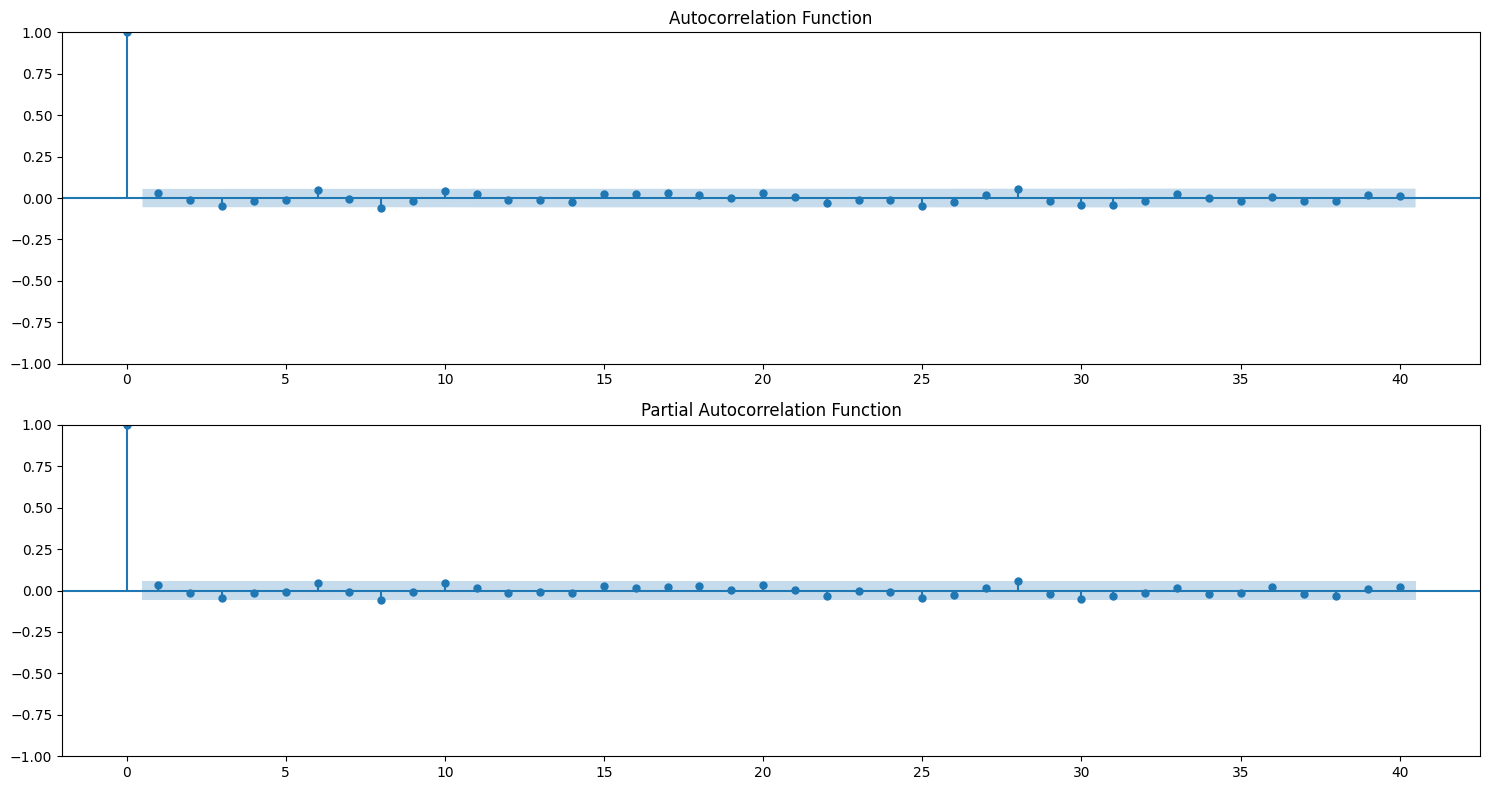


AR Model Summary:
                            AutoReg Model Results                             
Dep. Variable:                returns   No. Observations:                 1258
Model:                     AutoReg(1)   Log Likelihood                3317.634
Method:               Conditional MLE   S.D. of innovations              0.017
Date:                Wed, 26 Mar 2025   AIC                          -6629.268
Time:                        21:45:43   BIC                          -6613.858
Sample:                             1   HQIC                         -6623.476
                                 1258                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.571      0.568      -0.001       0.001
returns.L1     0.0313      0.028      1.110      0.267      -0.024       0.087
                                 

/Users/anyueow/anaconda3/envs/FINA4335/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


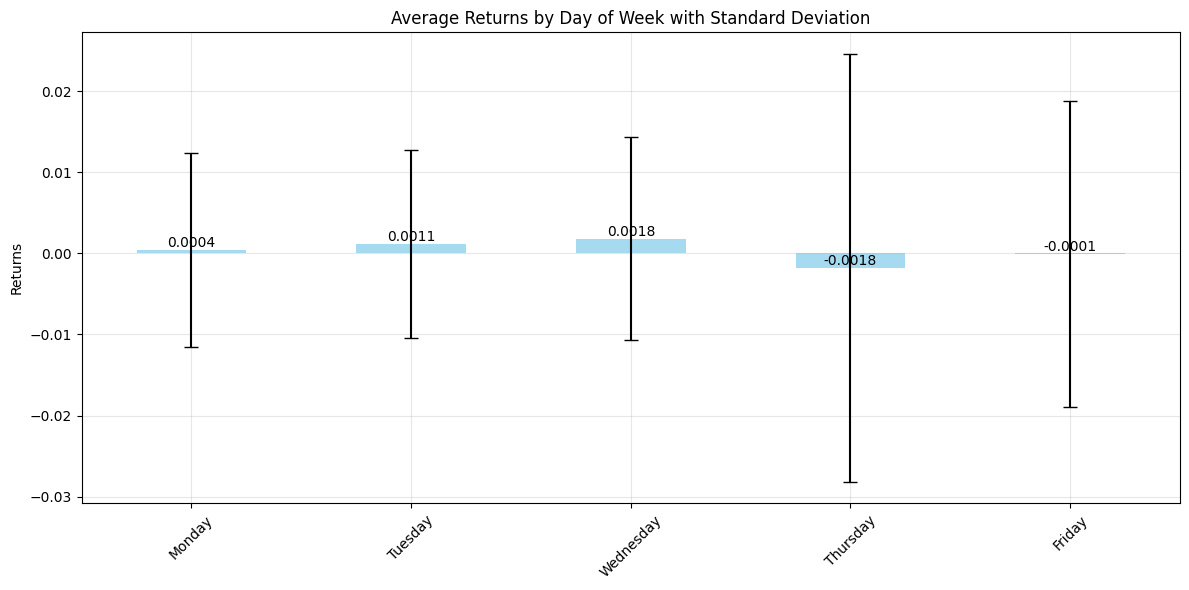

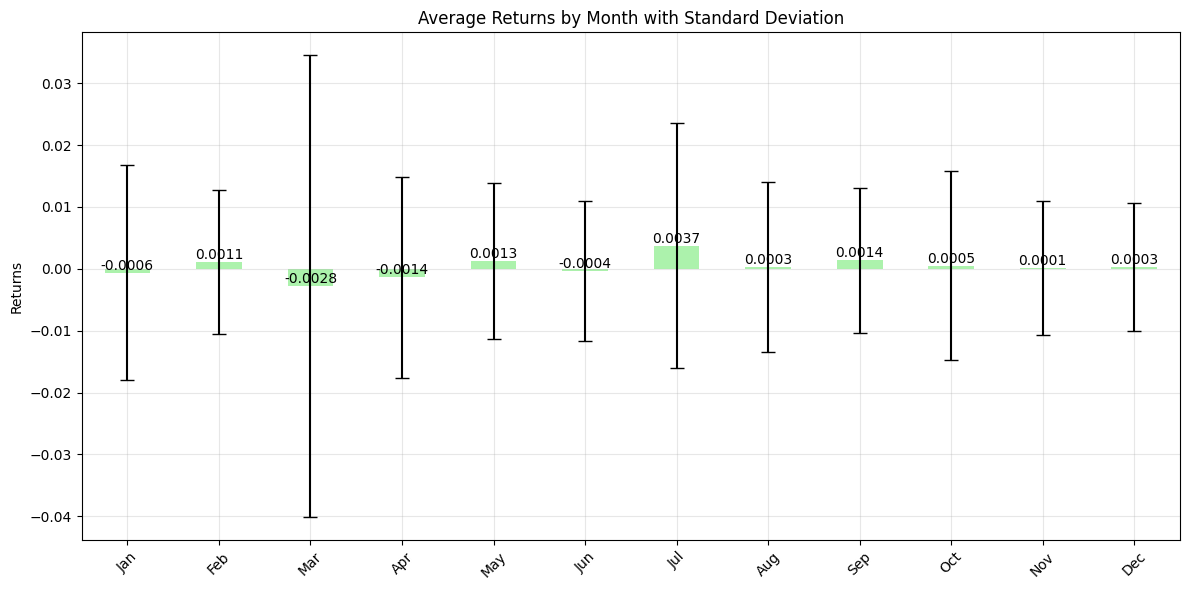


Seasonality Statistics:

Weekly Pattern:
             mean     std
Monday     0.0004  0.0120
Tuesday    0.0011  0.0116
Wednesday  0.0018  0.0125
Thursday  -0.0018  0.0264
Friday    -0.0001  0.0189

Monthly Pattern:
       mean     std
Jan -0.0006  0.0174
Feb  0.0011  0.0116
Mar -0.0028  0.0373
Apr -0.0014  0.0163
May  0.0013  0.0126
Jun -0.0004  0.0113
Jul  0.0037  0.0198
Aug  0.0003  0.0138
Sep  0.0014  0.0117
Oct  0.0005  0.0153
Nov  0.0001  0.0108
Dec  0.0003  0.0104

Day of Week Effect:
F-statistic: nan
p-value: nan

Month Effect:
F-statistic: nan
p-value: nan

Key Findings:
Best performing day: Wednesday (0.0018)
Worst performing day: Thursday (-0.0018)
Most volatile day: Thursday (std: 0.0264)
Best performing month: Jul (0.0037)
Worst performing month: Mar (-0.0028)
Most volatile month: Mar (std: 0.0373)


In [15]:
# 3. ACF and PACF Analysis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))
plot_acf(returns_clean, ax=ax1, lags=40)
ax1.set_title('Autocorrelation Function')
plot_pacf(returns_clean, ax=ax2, lags=40)
ax2.set_title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

# 4. AR Model with proper handling of missing values
# Create training data
returns_data = returns_clean.dropna()

# Fit AR model with error handling
try:
    model = AutoReg(returns_data, lags=1)
    results = model.fit()
    print("\nAR Model Summary:")
    print(results.summary())
except Exception as e:
    print(f"Error in AR model fitting: {e}")

# 5. Weekly Pattern Analysis
weekly_pattern = data.groupby(data.index.dayofweek)['returns'].agg(['mean', 'std']).round(4)
weekly_pattern.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

plt.figure(figsize=(12, 6))
ax = weekly_pattern['mean'].plot(kind='bar', yerr=weekly_pattern['std'], 
                               capsize=5, alpha=0.75, color='skyblue')
plt.title('Average Returns by Day of Week with Standard Deviation')
plt.ylabel('Returns')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, v in enumerate(weekly_pattern['mean']):
    ax.text(i, v, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 6. Monthly Pattern Analysis
monthly_pattern = data.groupby(data.index.month)['returns'].agg(['mean', 'std']).round(4)
monthly_pattern.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(12, 6))
ax = monthly_pattern['mean'].plot(kind='bar', yerr=monthly_pattern['std'], 
                                capsize=5, alpha=0.75, color='lightgreen')
plt.title('Average Returns by Month with Standard Deviation')
plt.ylabel('Returns')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, v in enumerate(monthly_pattern['mean']):
    ax.text(i, v, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 7. Print seasonal statistics
print("\nSeasonality Statistics:")
print("\nWeekly Pattern:")
print(weekly_pattern)
print("\nMonthly Pattern:")
print(monthly_pattern)

# 8. Calculate statistical significance
from scipy import stats

# Perform one-way ANOVA for day of week effect
dow_groups = [group for _, group in data.groupby(data.index.dayofweek)['returns']]
f_stat, p_value = stats.f_oneway(*dow_groups)
print("\nDay of Week Effect:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Perform one-way ANOVA for month effect
month_groups = [group for _, group in data.groupby(data.index.month)['returns']]
f_stat, p_value = stats.f_oneway(*month_groups)
print("\nMonth Effect:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# 9. Summary statistics
print("\nKey Findings:")
print(f"Best performing day: {weekly_pattern['mean'].idxmax()} ({weekly_pattern['mean'].max():.4f})")
print(f"Worst performing day: {weekly_pattern['mean'].idxmin()} ({weekly_pattern['mean'].min():.4f})")
print(f"Most volatile day: {weekly_pattern['std'].idxmax()} (std: {weekly_pattern['std'].max():.4f})")
print(f"Best performing month: {monthly_pattern['mean'].idxmax()} ({monthly_pattern['mean'].max():.4f})")
print(f"Worst performing month: {monthly_pattern['mean'].idxmin()} ({monthly_pattern['mean'].min():.4f})")
print(f"Most volatile month: {monthly_pattern['std'].idxmax()} (std: {monthly_pattern['std'].max():.4f})")